# Examples

### Download Dataset

In [1]:
!curl -o FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0  30748      0  0:00:02  0:00:02 --:--:-- 30748


In [2]:
import pandas as pd

### Convert Dataset to Pandas DataFrame

In [3]:
df = pd.read_csv("FuelConsumption.csv") 

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


> What is DataFrame object?

In [5]:
print(df.__doc__)

 Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure.

    Parameters
    ----------
    data : numpy ndarray (structured or homogeneous), dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects

        .. versionchanged :: 0.23.0
           If data is a dict, argument order is maintained for Python 3.6
           and later.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        RangeIndex (0, 1, 2, ..., n) if no column labels are provided
    dtype : dtype, default None
        Data type to fo

Brief statistical information about the data

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select fields to display and limit output to the top 3 entries

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


Plot the historram
* horizontal axis - feauture value
* vertical axis - number of entries with such feature value

In [13]:
import matplotlib.pyplot as plt

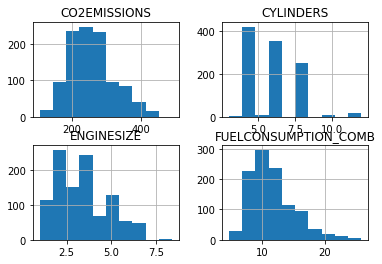

In [14]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

How does fuel consumption impact emission?

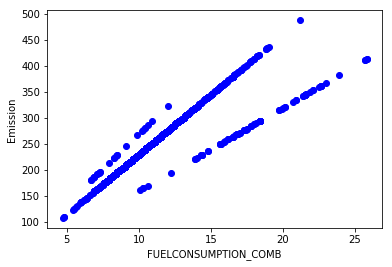

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

How does emission changes with engine size?

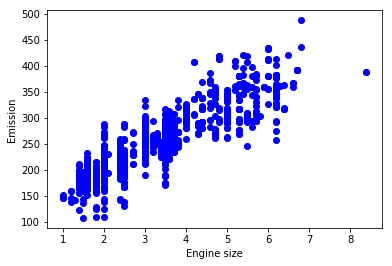

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Practice

## Build graphs

In [18]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


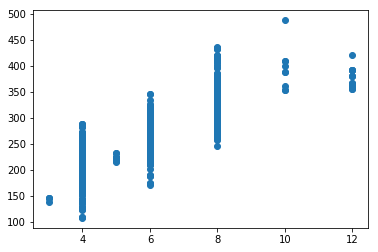

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.show()

## Train and Test Dataset

In [28]:
import numpy as np
np.random.random(5) # 5 values between 0 and 1

array([0.13066943, 0.08927312, 0.95482083, 0.18294649, 0.79912942])

### What is ```np.random.random```?

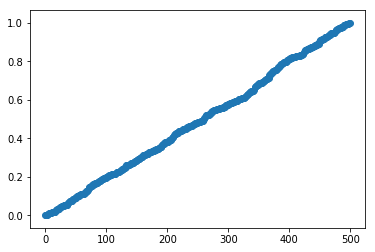

In [77]:
rand = np.array(np.random.random(500))
sort_rand = np.sort(rand)
plt.scatter(np.array(range(500)), sort_rand)

> Random variable ```np.random.random()``` is uniformely distributed between 0 and 1

### Generating Mask

In [82]:
msk = np.random.rand(len(df)) < 0.8
train_length = len(list(filter(lambda e: e == 1, msk)))
print('DF size', len(df), 'Mask size',
     'Which is actually', round(train_length/len(df)*100,2), '%')
train = cdf[msk]
test = cdf[~msk]

DF size 1067 Mask size Which is actually 81.63 %


### Select parameters

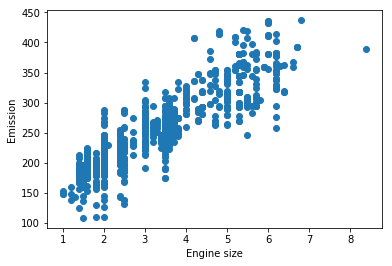

In [84]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Building a model

In [88]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_X = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_X, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.89710197]]
Intercept:  [126.4319645]


### Plot the line

Text(0,0.5,'Emission')

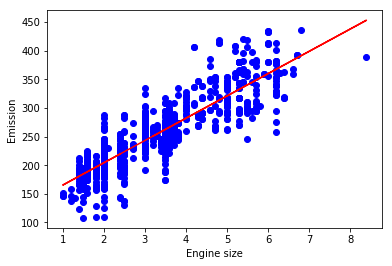

In [94]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Result evaluation

In [95]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.65
Residual sum of squares (MSE): 861.70
R2-score: 0.71


In [100]:
np.mean(np.absolute([-22,-3]))

12.5

In [103]:
np.mean(np.array([4,6]) ** 2) == (16+36)/2

True

In [104]:
r2_score([3,5] , [3.2,5.2]) # good score

0.96

In [108]:
r2_score([3,5], [3.6,5.9]) # fine score

0.4149999999999996

In [112]:
r2_score([0,0], [1,2]) # bad score

0.0

The best is 1, the worst is $-\infty$.

In [113]:
r2_score([3,5], [-3.6,-5.9]) # worse score

-80.185

<hr>

edX IBM: ML0101EN

Machine Learning with Python: A Practical Introduction